In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
data=pd.read_csv('C:/Users/munee/OneDrive/Desktop/DSA/ICT/StudentsPerformance.csv')

In [157]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [158]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [160]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [161]:
data.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [162]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Q1. Find out how many males and females participated in the test.

In [163]:
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

C:\Users\munee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

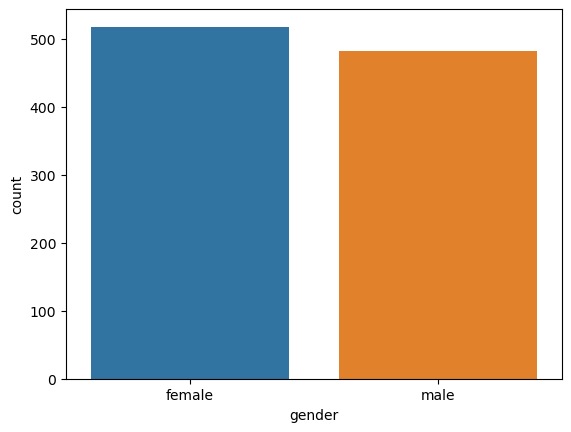

In [176]:
# count plot showing gender counts
# here more females ie 518 females and 482 males have participated in the test

sns.countplot(data['gender'])

## Q2. What do you think about the students' parental level of education?


In [165]:
data['parental level of education'].value_counts().reset_index()

,index,parental level of education
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [166]:
parent_education_value=data['parental level of education'].value_counts().values
parent_education_value

array([226, 222, 196, 179, 118,  59], dtype=int64)

In [167]:
parent_education=data['parental level of education'].value_counts().index
parent_education

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')

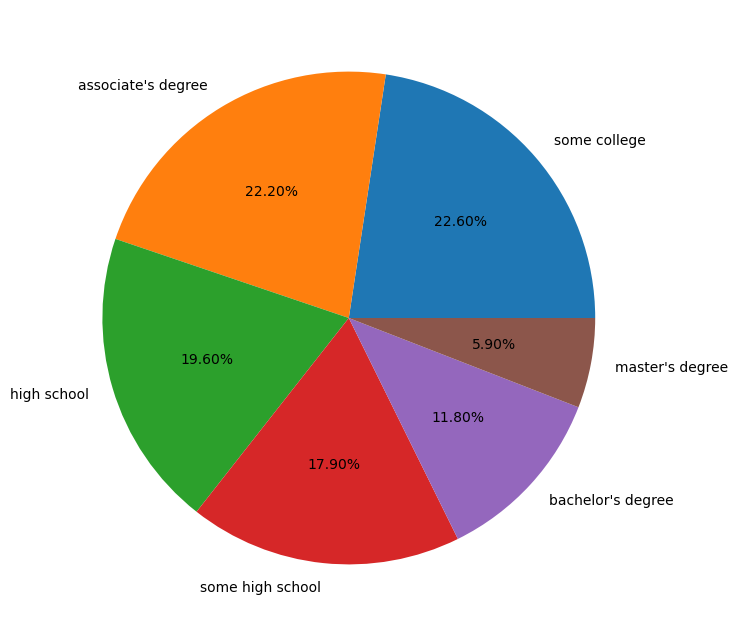

In [168]:
#pie chasrt showing parental level of education
plt.figure(figsize=(8,8))
plt.pie(parent_education_value,labels=parent_education,autopct='%1.2f%%')
plt.show()

**pie chart Observations**

*only 5% of the parents have done a PG

*around 11% have done thier Bachelor's and around 22% have done some associate degree

*But the large proportion around 37% have attained only high school level of education


## Q3. Who scores the most on average for math, reading and writing based on
● Gender● Test preparation course


In [169]:
# grouping scores based on the gender and then finding the mean

avg_gender=data.groupby('gender')[[ 'math score', 'reading score','writing score']].mean()
avg_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [170]:
# grouping scores based on test preperation course and then finding the mean
avg_test=data.groupby('test preparation course')[[ 'math score', 'reading score','writing score']].mean()
avg_test

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [171]:
# grouping scores based on first gender,then test preparation course and then finding the mean

average=data.groupby(['gender','test preparation course'])[ 'math score', 'reading score','writing score'].mean()
average

C:\Users\munee\AppData\Local\Temp\ipykernel_3428\2870842130.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average=data.groupby(['gender','test preparation course'])[ 'math score', 'reading score','writing score'].mean()


math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

## Q4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course

In [172]:
# grouping scores based on the gender and finding the varience

var_gender=data.groupby('gender')[[ 'math score', 'reading score','writing score']].var()
var_gender

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [173]:
# grouping scores based on test preperation course and finding the varience

var_test=data.groupby('test preparation course')[['math score','reading score','writing score']].var()
var_test

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


In [174]:
# grouping scores based on first gender then test preparation course and then finding the varience

varience=data.groupby(['gender','test preparation course'])[ 'math score', 'reading score','writing score'].var()
varience

C:\Users\munee\AppData\Local\Temp\ipykernel_3428\1479368139.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  varience=data.groupby(['gender','test preparation course'])[ 'math score', 'reading score','writing score'].var()


math score  reading score  writing score
gender test preparation course                                          
female completed                208.173913     161.175546     149.836897
       none                     272.602767     214.241220     225.495172
male   completed                197.098133     185.297987     166.098233
       none                     205.513600     184.843553     181.394687

## Q5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [175]:
#25% of highest math scores out of 1000 entries taken for bonus

math_toppers=data[data['math score']>=data['math score'].quantile(.75)]
math_toppers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
